In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data 
data = pd.read_csv("train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# features and target
X = data.drop("price_range", axis=1)
y = data["price_range"]


In [4]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
#  model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# prediction
y_pred = model.predict(X_test)

In [8]:
# accuracy
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.8925


In [9]:
print(data.shape)

(2000, 21)


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
print(data.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

Accuracy (sklearn): 0.8925

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



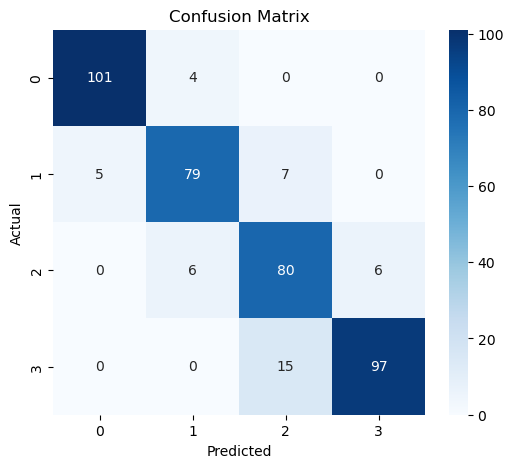

In [12]:
# Evaluation: accuracy, classification report, confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# using predictions already made (y_pred)
print('Accuracy (sklearn):', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Quick model comparison: LogisticRegression, KNeighbors, RandomForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

models = {
    'Logistic': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': model  # already trained above
}
results = {}
for name, m in models.items():
    # cross-validate on training data to compare generalization
    scores = cross_val_score(m, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()

print('Cross-validated accuracy (train):')
for name, score in results.items():
    print(f'{name}: {score:.4f}')

# Fit & evaluate on test set for a direct comparison
for name, m in models.items():
    m.fit(X_train, y_train)
    acc = m.score(X_test, y_test)
    print(f'{name} test accuracy: {acc:.4f}')

Cross-validated accuracy (train):
Logistic: 0.9500
KNN: 0.4781
RandomForest: 0.8706
Logistic test accuracy: 0.9750
KNN test accuracy: 0.5300
RandomForest test accuracy: 0.8925


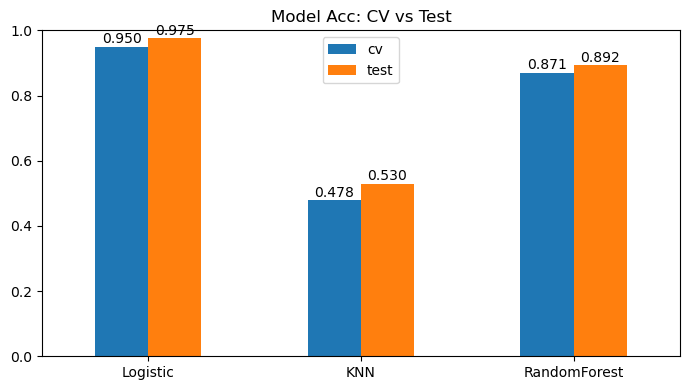

In [15]:
# Short model comparison (CV & test accuracies)
import pandas as pd
from sklearn.model_selection import cross_val_score
cv = {n: cross_val_score(m, X_train, y_train, cv=5).mean() for n,m in models.items()}
test = {n: m.fit(X_train,y_train).score(X_test,y_test) for n,m in models.items()}
df = pd.DataFrame([cv, test], index=['cv','test']).T
ax = df.plot.bar(figsize=(7,4), ylim=(0,1), rot=0, title='Model Acc: CV vs Test')
for p in ax.patches: ax.annotate(f"{p.get_height():.3f}", (p.get_x()+p.get_width()/2, p.get_height()+0.01), ha='center')
plt.tight_layout()
plt.show()

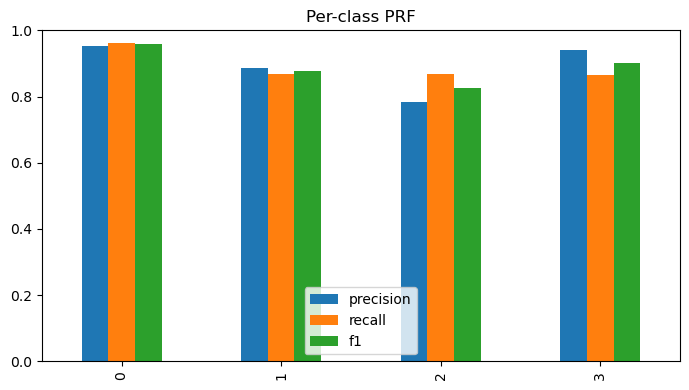

In [16]:
# Short per-class PRF bar chart
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
p,r,f,_ = precision_recall_fscore_support(y_test, y_pred, average=None)
cls = np.unique(y_test)
df = pd.DataFrame({'precision':p,'recall':r,'f1':f}, index=cls)
df.plot.bar(figsize=(7,4), ylim=(0,1), title='Per-class PRF')
plt.tight_layout()
plt.show()

In [17]:
imp = model.feature_importances_
features = X.columns

fi = pd.DataFrame({"Feature": features, "Importance": imp})
print(fi.sort_values(by="Importance", ascending=False).head())


          Feature  Importance
13            ram    0.470962
0   battery_power    0.074796
11      px_height    0.058538
12       px_width    0.056722
8       mobile_wt    0.041434


In [19]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


[[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [21]:
import joblib

joblib.dump(model, "mobile_price_model.pkl")


['mobile_price_model.pkl']

In [22]:
model = joblib.load("mobile_price_model.pkl")


In [23]:
sample = X.iloc[0].values.reshape(1, -1)
print(model.predict(sample))


[3]
